In [50]:
import numpy as np
from tensorflow.keras.datasets import mnist

In [51]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

n = 5000
x_train = x_train[:n]
y_train = y_train[:n]

x_train = x_train.astype(np.float32)/255.0
x_train = x_train.reshape(n,784)
y_train = np.eye(10)[y_train]

In [52]:
print("X shape:", x_train.shape)   
print("Y shape:", y_train.shape)  

X shape: (5000, 784)
Y shape: (5000, 10)


In [53]:
input_dim = 784
hidden_dim = 128
output_dim = 10

w1 = np.random.randn(hidden_dim,input_dim)*np.sqrt(2/input_dim)

w2 = np.random.randn(output_dim,hidden_dim)*np.sqrt(2/hidden_dim)

b1 = np.zeros((hidden_dim, 1))
b2 = np.zeros((output_dim, 1))


print("W1:", w1.shape)  
print("b1:", b1.shape)  
print("W2:", w2.shape)  
print("b2:", b2.shape)  

W1: (128, 784)
b1: (128, 1)
W2: (10, 128)
b2: (10, 1)


In [54]:
def relu(z):
    return np.maximum(0,z)

def softmax(z):
    exp = np.exp(z-np.max(z,axis=0,keepdims=True))
    return exp/np.sum(exp,axis=0,keepdims=True)
def forward_pass(x,w1,b1,w2,b2):
    z1 = w1@x.T+b1
    a1 = relu(z1)
    z2 = w2@a1+b2
    a2 = softmax(z2)
    return z1,a1,z2,a2
    

In [55]:
batch = x_train[:32] 
Z1, A1, Z2, A2 = forward_pass(batch, w1, b1, w2, b2)

print("Output probabilities shape:", A2.shape) 
print("Predicted labels shape:", np.argmax(A2, axis=0).shape) 


Output probabilities shape: (10, 32)
Predicted labels shape: (32,)


In [56]:
def compute_loss(y,a2):
    m = y.shape[0]
    y = y.T
    log_probs = np.log(a2+1e-9)
    loss = -np.sum(y*log_probs)/m
    return loss
    

In [57]:
def backward_pass(X, Y, Z1, A1, A2, W2):

    m = X.shape[0] 
    Y = Y.T
    dZ2 = A2 - Y 
    dW2 = (dZ2 @ A1.T) / m    
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    dA1 = W2.T @ dZ2
    dZ1 = dA1 * (Z1 > 0)
    dW1 = (dZ1 @ X) / m 
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    return dW1, db1, dW2, db2


In [58]:
def update_parameters(w1,b1,w2,b2,dw1,db1,dw2,db2,lr=0.01):
    w1 -= lr * dw1
    b1 -= lr * db1
    w2 -= lr * dw2
    b2 -= lr * db2
    return w1, b1, w2, b2

In [59]:
def train(x_train, y_train, w1, b1, w2, b2, epochs=20, batch_size=32, lr=0.01):

    n_samples = x_train.shape[0]
    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        indices = np.random.permutation(n_samples)
        X_train = x_train[indices]
        Y_train = y_train[indices]

        epoch_loss = 0
        correct_predictions = 0
        for i in range(0, n_samples, batch_size):
            
            X_batch = X_train[i:i+batch_size]
            Y_batch = Y_train[i:i+batch_size]

            # Forward pass
            Z1, A1, Z2, A2 = forward_pass(X_batch, w1, b1, w2, b2)

            # Compute loss
            loss = compute_loss(Y_batch, A2)
            epoch_loss += loss

            # Accuracy in current batch
            predictions = np.argmax(A2, axis=0)
            true_labels = np.argmax(Y_batch, axis=1)
            correct_predictions += np.sum(predictions == true_labels)

            # Backprop
            dW1, db1, dW2, db2 = backward_pass(X_batch, Y_batch, Z1, A1, A2, w2)

            # Update parameters
            W1, b1, W2, b2 = update_parameters(w1, b1, w2, b2, dW1, db1, dW2, db2, lr)


        avg_loss = epoch_loss / (n_samples // batch_size)
        accuracy = correct_predictions / n_samples

        loss_history.append(avg_loss)
        accuracy_history.append(accuracy)

        print(f"Epoch {epoch+1}/{epochs} | Loss: {avg_loss:.4f} | Accuracy: {accuracy:.4f}")

    return W1, b1, W2, b2, loss_history, accuracy_history


In [60]:
W1, b1, W2, b2, loss_history, accuracy_history = train(
    x_train, y_train, w1, b1, w2, b2,
    epochs=20, batch_size=64, lr=0.01
)

Epoch 1/20 | Loss: 1.9789 | Accuracy: 0.4096
Epoch 2/20 | Loss: 1.3994 | Accuracy: 0.6996
Epoch 3/20 | Loss: 1.0672 | Accuracy: 0.7874
Epoch 4/20 | Loss: 0.8655 | Accuracy: 0.8210
Epoch 5/20 | Loss: 0.7383 | Accuracy: 0.8410
Epoch 6/20 | Loss: 0.6554 | Accuracy: 0.8542
Epoch 7/20 | Loss: 0.5948 | Accuracy: 0.8646
Epoch 8/20 | Loss: 0.5466 | Accuracy: 0.8748
Epoch 9/20 | Loss: 0.5118 | Accuracy: 0.8800
Epoch 10/20 | Loss: 0.4829 | Accuracy: 0.8834
Epoch 11/20 | Loss: 0.4563 | Accuracy: 0.8864
Epoch 12/20 | Loss: 0.4405 | Accuracy: 0.8918
Epoch 13/20 | Loss: 0.4256 | Accuracy: 0.8956
Epoch 14/20 | Loss: 0.4084 | Accuracy: 0.8994
Epoch 15/20 | Loss: 0.3905 | Accuracy: 0.9040
Epoch 16/20 | Loss: 0.3859 | Accuracy: 0.9072
Epoch 17/20 | Loss: 0.3695 | Accuracy: 0.9066
Epoch 18/20 | Loss: 0.3651 | Accuracy: 0.9088
Epoch 19/20 | Loss: 0.3544 | Accuracy: 0.9118
Epoch 20/20 | Loss: 0.3516 | Accuracy: 0.9114


In [61]:
def evaluate(x_test, y_test, w1, b1, w2, b2):
    
    Z1, A1, Z2, A2 = forward_pass(x_test, w1, b1, w2, b2)

    # Predictions (class index)
    predictions = np.argmax(A2, axis=0)

    # True labels (decode one-hot)
    true_labels = np.argmax(y_test, axis=1)

    # Accuracy
    accuracy = np.mean(predictions == true_labels)

    return accuracy


In [62]:
x_test = x_test.astype(np.float32) / 255.0
x_test = x_test.reshape(x_test.shape[0], 784)
y_test = np.eye(10)[y_test]
test_accuracy = evaluate(x_test, y_test, W1, b1, W2, b2)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.8906


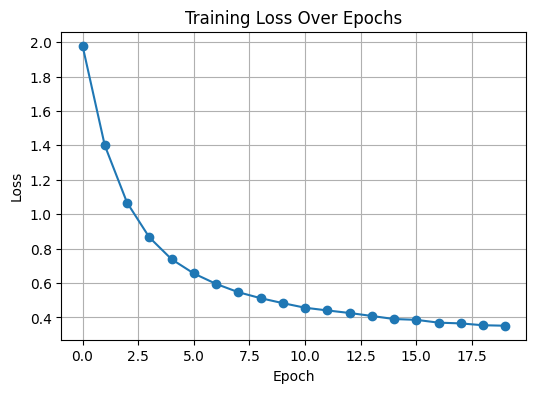

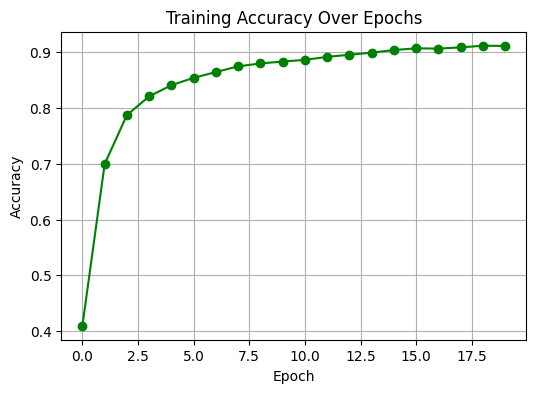

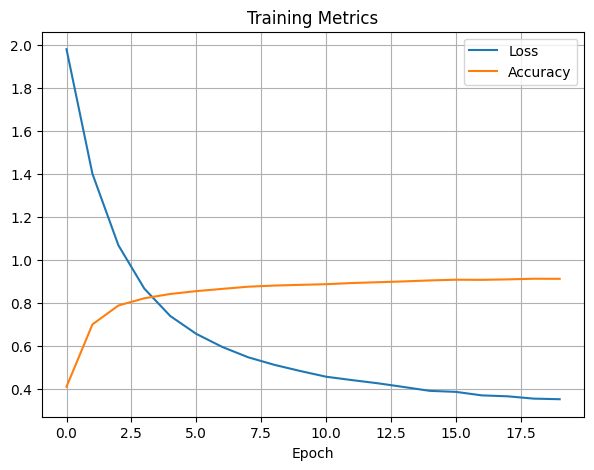

In [63]:
import matplotlib.pyplot as plt

# ---- Loss Curve ----
plt.figure(figsize=(6,4))
plt.plot(loss_history, marker='o')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# ---- Accuracy Curve ----
plt.figure(figsize=(6,4))
plt.plot(accuracy_history, marker='o', color='green')
plt.title("Training Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


plt.figure(figsize=(7,5))
plt.plot(loss_history, label="Loss")
plt.plot(accuracy_history, label="Accuracy")
plt.xlabel("Epoch")
plt.title("Training Metrics")
plt.legend()
plt.grid(True)
plt.show()



In [64]:
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_pass(X, W1, b1, W2, b2)
    predictions = np.argmax(A2, axis=0)
    return predictions


In [66]:
preds = predict(x_test, W1, b1, W2, b2)
print(preds[:20])  # print first 20 predictions


[7 2 1 0 4 1 4 9 6 9 0 2 9 0 1 5 9 7 3 4]


In [68]:
true_labels = np.argmax(y_test, axis=1)

for i in range(10):
    print(f"Image {i}: Predicted = {preds[i]}, True = {true_labels[i]}")


Image 0: Predicted = 7, True = 7
Image 1: Predicted = 2, True = 2
Image 2: Predicted = 1, True = 1
Image 3: Predicted = 0, True = 0
Image 4: Predicted = 4, True = 4
Image 5: Predicted = 1, True = 1
Image 6: Predicted = 4, True = 4
Image 7: Predicted = 9, True = 9
Image 8: Predicted = 6, True = 5
Image 9: Predicted = 9, True = 9


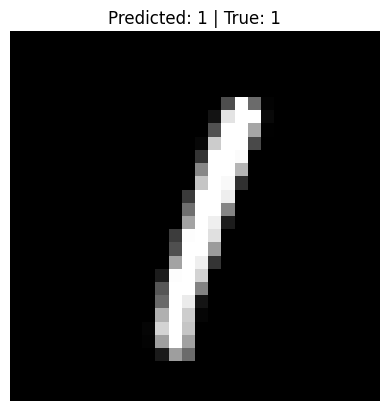

In [70]:
import matplotlib.pyplot as plt

idx = 5 

plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {preds[idx]} | True: {true_labels[idx]}")
plt.axis('off')
plt.show()
